In [157]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [158]:
Df = pd.read_csv('dados/train.csv')

<h2>Análise Exploratória dos Dados e Limpeza de Dados</h2>

In [159]:
Df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [160]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [161]:
Df.shape

(76020, 371)

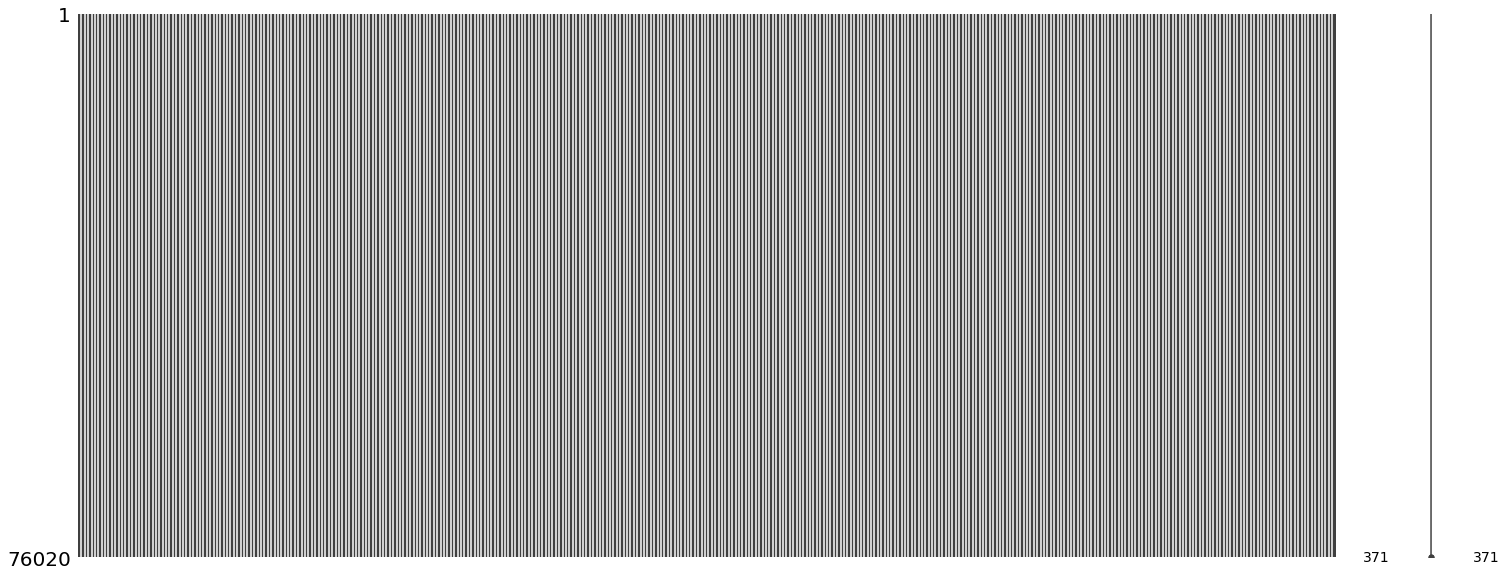

In [162]:
#verificar dados missing
import missingno as msno

msno.matrix(Df)
plt.show()

In [163]:
print(Df['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


<AxesSubplot:xlabel='TARGET', ylabel='Count'>

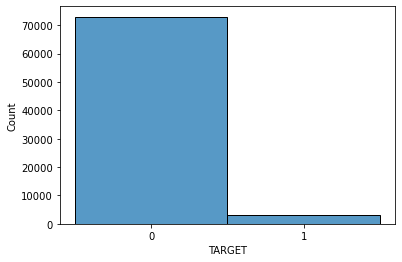

In [164]:
import seaborn as sns

hist_df = Df.TARGET
hist_df = hist_df.astype(str)

sns.histplot(hist_df)

In [165]:
Df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [166]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [167]:
# verificando valores unicos de cada coluna
for column in Df.columns:
    print('Column: {} - Unique Values: {}'.format(column, Df[column].unique()))

Column: ID - Unique Values: [     1      3      4 ... 151835 151836 151838]
Column: var3 - Unique Values: [      2     229     178       0       8       3       4      10     110
       7     177       1       6     137      17 -999999      13      14
     148       5      11      15     122      22       9      58     121
      12     127      33     125     209      72      31      51      16
     107     174     141     191     104     129      18      49      73
      94     131     219     187     114      28      89     115      53
     126      47      84     235     161     197      23      30     146
     158     138      26     120      66     216     215      90      20
      21     103     192     142      29     163     223      95      98
      38     156      97     105     150     183     184      52      54
     220      25     225      86     124      27     162      19     195
     218      24      60     108      82      36     102     175     144
     169      64  

Column: ind_var30_0 - Unique Values: [1 0]
Column: ind_var30 - Unique Values: [0 1]
Column: ind_var31_0 - Unique Values: [0 1]
Column: ind_var31 - Unique Values: [0 1]
Column: ind_var32_cte - Unique Values: [0 1]
Column: ind_var32_0 - Unique Values: [0 1]
Column: ind_var32 - Unique Values: [0 1]
Column: ind_var33_0 - Unique Values: [0 1]
Column: ind_var33 - Unique Values: [0 1]
Column: ind_var34_0 - Unique Values: [0 1]
Column: ind_var34 - Unique Values: [0 1]
Column: ind_var37_cte - Unique Values: [0 1]
Column: ind_var37_0 - Unique Values: [0 1]
Column: ind_var37 - Unique Values: [0 1]
Column: ind_var39_0 - Unique Values: [1 0]
Column: ind_var40_0 - Unique Values: [0 1]
Column: ind_var40 - Unique Values: [0 1]
Column: ind_var41_0 - Unique Values: [1 0]
Column: ind_var41 - Unique Values: [0]
Column: ind_var39 - Unique Values: [0 1]
Column: ind_var44_0 - Unique Values: [0 1]
Column: ind_var44 - Unique Values: [0 1]
Column: ind_var46_0 - Unique Values: [0]
Column: ind_var46 - Unique Valu

Column: saldo_var13 - Unique Values: [0.0000000e+00 3.0000000e+02 2.7000000e+04 8.4900000e+04 1.2000000e+05
 3.0000000e+05 7.5000000e+04 9.0000000e+04 1.0500000e+05 2.1000000e+05
 6.0000000e+02 1.5900000e+05 7.5750000e+04 3.0000000e+04 1.8090000e+04
 4.5000000e+05 9.3000000e+04 6.0000000e+04 1.0200000e+05 1.9500000e+05
 1.6950000e+05 1.7400000e+05 2.1000000e+04 1.0506000e+05 2.7015000e+04
 1.0800000e+05 5.4000000e+04 1.8000000e+04 1.0470300e+05 2.1435900e+04
 2.0400000e+05 1.6500000e+04 6.0753000e+04 7.5450000e+04 3.6000000e+04
 1.3499700e+05 9.1285530e+04 1.5000000e+05 4.3141200e+05 1.8000000e+05
 1.9800000e+05 1.3500000e+05 3.0621000e+04 3.8164140e+04 6.6000000e+04
 3.6000000e+05 9.0000000e+03 1.6200000e+05 4.5000000e+04 1.5006000e+05
 3.9000000e+04 2.2500000e+05 3.9900000e+05 1.2044295e+05 2.0860407e+05
 8.4000000e+04 2.4000000e+04 6.9000000e+04 2.7000000e+05 1.0950000e+05
 8.1000000e+04 2.4000000e+05 5.1000000e+04 4.2000000e+04 4.8003000e+04
 1.8978000e+05 9.3003000e+04 1.0500300e+

Column: num_aport_var17_hace3 - Unique Values: [ 0  3  6 12  9]
Column: num_aport_var17_ult1 - Unique Values: [ 0  3 18  6  9 12 15 21]
Column: num_aport_var33_hace3 - Unique Values: [ 0  3 12  6]
Column: num_aport_var33_ult1 - Unique Values: [0 6 3]
Column: num_var7_emit_ult1 - Unique Values: [0 3]
Column: num_var7_recib_ult1 - Unique Values: [ 0  6  3 12  9 24]
Column: num_compra_var44_hace3 - Unique Values: [0 3 9 6]
Column: num_compra_var44_ult1 - Unique Values: [ 0  3  6  9 39 21 18 24 12 15]
Column: num_ent_var16_ult1 - Unique Values: [ 0  3  6 12  9 24 21 30 60 15 18 45 27]
Column: num_var22_hace2 - Unique Values: [  0   3   9   6  15  12  21  24  30  18  99  27  33  39  36  45  42  54
  48 123  60  63]
Column: num_var22_hace3 - Unique Values: [  0   3   6   9  15  12  18  39  21  27  24  30  33  36  45 108  51  48
  42]
Column: num_var22_ult1 - Unique Values: [ 0  6  3 12  9 21 18 15 27 30 24 36 48 33 42 51 39 96]
Column: num_var22_ult3 - Unique Values: [  0   3   9  15   6  12

Column: saldo_medio_var13_largo_hace3 - Unique Values: [0.0000000e+00 1.8000000e+04 1.5000030e+04 4.2580650e+04 7.2580800e+03
 5.8065000e+02 1.6071432e+05 9.6000000e+03 7.2000000e+03 3.7838730e+04
 2.4999900e+03 1.1793228e+05 9.6774300e+03 1.9354830e+04 3.0000000e+03
 4.8387000e+03 6.9365040e+04 1.9200000e+05 1.5453720e+05 8.4000030e+04
 1.1000100e+03 1.5677430e+04 2.9032320e+04 1.4700000e+05 1.0993566e+05
 3.8712000e+02 5.4193500e+03 5.2758600e+04 7.9999800e+03 1.3935480e+04
 9.1034700e+03 3.4838700e+03 6.0967740e+04 1.0714200e+03 6.2069100e+03
 1.6000020e+04 3.9999900e+03 3.1055100e+03 1.2096780e+04 6.3105600e+03
 2.2500000e+04 8.0199990e+04 5.4193530e+04 4.5000030e+04 1.2857400e+03
 2.1428580e+04 7.2580680e+04 8.6896500e+03 2.2876170e+04 6.0000000e+03
 2.7999990e+04 1.0800003e+05 5.0000100e+03 1.1249970e+04 5.6612100e+03
 5.1726000e+02 1.9354800e+03 3.8709690e+04 2.4700020e+04 1.4516130e+04
 2.1483900e+04 7.5200040e+04 4.7300010e+04 1.0645158e+05 7.7419500e+03
 2.6249970e+04 1.74193

In [168]:
#excluindo colunas com apenas 1 valor no caso 0
for col in Df.columns:
    if len(Df[col].unique()) == 1:
        Df.drop(col,inplace=True,axis=1)

In [169]:
Df.drop(columns='ID', inplace=True)
#dropando coluna id

[Text(0.5, 1.0, 'Scatter plot')]

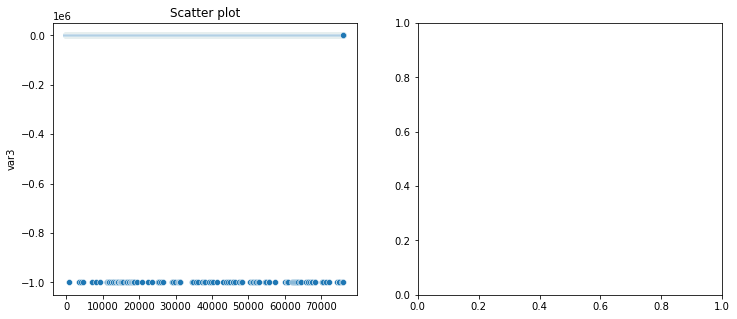

In [170]:
fig, axs = plt.subplots(ncols=2, figsize = (12,5))

sns.scatterplot(data = Df['var3'], ax=axs[0]).set(title = "Scatter plot")


In [171]:
Df['var3'].replace(-999999, 2, inplace = True)

<AxesSubplot:>

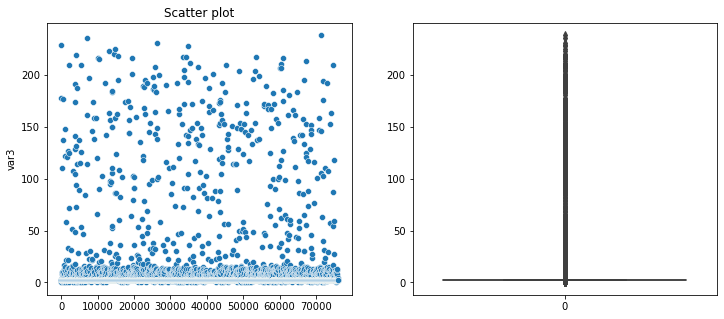

In [172]:
fig, axs = plt.subplots(ncols=2, figsize = (12,5))

sns.scatterplot(data = Df['var3'], ax=axs[0]).set(title = "Scatter plot")
sns.boxplot(data = Df['var3'])

<h2>treinando o modelo<h2/>

In [173]:
#normalizando as variaveis
x = Df.drop(columns='TARGET')
y = Df.loc[:,['TARGET']].values
x = StandardScaler().fit_transform(x)

In [174]:
X_features = x
y_labels = y

print()

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state = 25)

In [202]:
# rebalanceando com smote 
# pipeline
over = ADASYN(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

#fazendo o smote
X_res ,y_res= pipeline.fit_resample(X_train, y_train)

In [203]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_res ,y_res)

logisticRegr.score(X_res ,y_res)



/home/hard/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7586732361456799

In [204]:
#vamos tentar o xgboost
xgb = XGBClassifier(n_estimators = 100, random_state =16, eval_metric = "auc",early_stopping_rounds = 100)

xgb.fit(X_res, y_res, eval_set = [(X_train, y_train), (X_test, y_test)] )

xgb_roc_score = roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1], average = 'macro')

print('ROC_AUC score : {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83397	validation_1-auc:0.80947
[1]	validation_0-auc:0.84395	validation_1-auc:0.82160
[2]	validation_0-auc:0.84723	validation_1-auc:0.82369
[3]	validation_0-auc:0.84911	validation_1-auc:0.82432
[4]	validation_0-auc:0.85232	validation_1-auc:0.82445
[5]	validation_0-auc:0.85487	validation_1-auc:0.82442
[6]	validation_0-auc:0.85603	validation_1-auc:0.82602
[7]	validation_0-auc:0.85789	validation_1-auc:0.82614
[8]	validation_0-auc:0.85962	validation_1-auc:0.82550
[9]	validation_0-auc:0.86079	validation_1-auc:0.82529
[10]	validation_0-auc:0.86225	validation_1-auc:0.82570
[11]	validation_0-auc:0.86262	validation_1-auc:0.82557
[12]	validation_0-auc:0.86537	validation_1-auc:0.82680
[13]	validation_0-auc:0.86656	validation_1-auc:0.82696
[14]	validation_0-auc:0.86813	validation_1-auc:0.82741
[15]	validation_0-auc:0.86845	validation_1-auc:0.82759
[16]	validation_0-auc:0.86918	validation_1-auc:0.82739
[17]	validation_0-auc:0.87110	validation_1-auc:0.82792
[18]	validation_0-au

In [205]:
from sklearn.model_selection import GridSearchCV

# altere n_estimators para  melhores resultados

xgb= XGBClassifier(n_estimators = 10, random_state =16, early_stopping_rounds = 100, eval_metric = "auc",objective="binary:logistic")
# hyper-parameters 
params = {'max_depth' : [5,7,9] , 'min_child_weight' : [1,3,5] , 'colsample_bytree' : [0.5, 0.75,1] ,'learning_rate' : [0.01,0.1,0.2]}
# cross-vaildation  3
gridcv = GridSearchCV(xgb, param_grid = params, cv = 3 )

gridcv.fit(X_res, y_res, eval_set = [(X_train, y_train), (X_test, y_test)] )

print('GridSearchCV best parameters : ', gridcv.best_params_)


[0]	validation_0-auc:0.72806	validation_1-auc:0.70427
[1]	validation_0-auc:0.74496	validation_1-auc:0.73381
[2]	validation_0-auc:0.74449	validation_1-auc:0.73453
[3]	validation_0-auc:0.78890	validation_1-auc:0.77941
[4]	validation_0-auc:0.79017	validation_1-auc:0.77656
[5]	validation_0-auc:0.78825	validation_1-auc:0.77169
[6]	validation_0-auc:0.78461	validation_1-auc:0.76816
[7]	validation_0-auc:0.79789	validation_1-auc:0.78288
[8]	validation_0-auc:0.80813	validation_1-auc:0.79394
[9]	validation_0-auc:0.80633	validation_1-auc:0.79085
[0]	validation_0-auc:0.74783	validation_1-auc:0.74664
[1]	validation_0-auc:0.75382	validation_1-auc:0.75544
[2]	validation_0-auc:0.76120	validation_1-auc:0.75851
[3]	validation_0-auc:0.80811	validation_1-auc:0.80032
[4]	validation_0-auc:0.80728	validation_1-auc:0.79791
[5]	validation_0-auc:0.80552	validation_1-auc:0.79424
[6]	validation_0-auc:0.80254	validation_1-auc:0.79129
[7]	validation_0-auc:0.81478	validation_1-auc:0.80333
[8]	validation_0-auc:0.82449

[2]	validation_0-auc:0.74495	validation_1-auc:0.73477
[3]	validation_0-auc:0.79721	validation_1-auc:0.78735
[4]	validation_0-auc:0.79618	validation_1-auc:0.78308
[5]	validation_0-auc:0.79272	validation_1-auc:0.77698
[6]	validation_0-auc:0.79137	validation_1-auc:0.77630
[7]	validation_0-auc:0.80792	validation_1-auc:0.79317
[8]	validation_0-auc:0.81759	validation_1-auc:0.80247
[9]	validation_0-auc:0.81606	validation_1-auc:0.80056
[0]	validation_0-auc:0.74716	validation_1-auc:0.74495
[1]	validation_0-auc:0.75475	validation_1-auc:0.75371
[2]	validation_0-auc:0.76336	validation_1-auc:0.75978
[3]	validation_0-auc:0.81143	validation_1-auc:0.80379
[4]	validation_0-auc:0.81093	validation_1-auc:0.80071
[5]	validation_0-auc:0.81016	validation_1-auc:0.79917
[6]	validation_0-auc:0.80846	validation_1-auc:0.79860
[7]	validation_0-auc:0.82341	validation_1-auc:0.81233
[8]	validation_0-auc:0.83261	validation_1-auc:0.82088
[9]	validation_0-auc:0.83134	validation_1-auc:0.81884
[0]	validation_0-auc:0.75360

[4]	validation_0-auc:0.79641	validation_1-auc:0.77434
[5]	validation_0-auc:0.81207	validation_1-auc:0.79047
[6]	validation_0-auc:0.81922	validation_1-auc:0.79734
[7]	validation_0-auc:0.82324	validation_1-auc:0.80083
[8]	validation_0-auc:0.82806	validation_1-auc:0.80484
[9]	validation_0-auc:0.82592	validation_1-auc:0.80310
[0]	validation_0-auc:0.77809	validation_1-auc:0.74554
[1]	validation_0-auc:0.78623	validation_1-auc:0.75153
[2]	validation_0-auc:0.79007	validation_1-auc:0.76089
[3]	validation_0-auc:0.82753	validation_1-auc:0.79791
[4]	validation_0-auc:0.82404	validation_1-auc:0.79464
[5]	validation_0-auc:0.83653	validation_1-auc:0.80533
[6]	validation_0-auc:0.84198	validation_1-auc:0.81049
[7]	validation_0-auc:0.84588	validation_1-auc:0.81485
[8]	validation_0-auc:0.84945	validation_1-auc:0.82014
[9]	validation_0-auc:0.84722	validation_1-auc:0.81863
[0]	validation_0-auc:0.77523	validation_1-auc:0.73568
[1]	validation_0-auc:0.78553	validation_1-auc:0.74883
[2]	validation_0-auc:0.78934

[6]	validation_0-auc:0.82128	validation_1-auc:0.79529
[7]	validation_0-auc:0.82726	validation_1-auc:0.80248
[8]	validation_0-auc:0.83254	validation_1-auc:0.80892
[9]	validation_0-auc:0.83038	validation_1-auc:0.80709
[0]	validation_0-auc:0.77824	validation_1-auc:0.75053
[1]	validation_0-auc:0.78659	validation_1-auc:0.75687
[2]	validation_0-auc:0.79022	validation_1-auc:0.76428
[3]	validation_0-auc:0.83028	validation_1-auc:0.79985
[4]	validation_0-auc:0.82756	validation_1-auc:0.79592
[5]	validation_0-auc:0.84132	validation_1-auc:0.80775
[6]	validation_0-auc:0.84860	validation_1-auc:0.81396
[7]	validation_0-auc:0.85300	validation_1-auc:0.81867
[8]	validation_0-auc:0.85566	validation_1-auc:0.82216
[9]	validation_0-auc:0.85581	validation_1-auc:0.82008
[0]	validation_0-auc:0.77387	validation_1-auc:0.73863
[1]	validation_0-auc:0.78884	validation_1-auc:0.75312
[2]	validation_0-auc:0.79087	validation_1-auc:0.75967
[3]	validation_0-auc:0.83301	validation_1-auc:0.79971
[4]	validation_0-auc:0.82989

In [52]:
print('GridSearchCV best parameters : ', gridcv.best_params_)

GridSearchCV best parameters :  {'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1}


In [206]:
params=gridcv.best_params_
clf =XGBClassifier(**params)
clf.fit(X_res, y_res, eval_set = [(X_train, y_train), (X_test, y_test)] )

[0]	validation_0-logloss:0.63796	validation_1-logloss:0.63909
[1]	validation_0-logloss:0.59146	validation_1-logloss:0.59329
[2]	validation_0-logloss:0.55107	validation_1-logloss:0.55374
[3]	validation_0-logloss:0.51836	validation_1-logloss:0.52185
[4]	validation_0-logloss:0.48993	validation_1-logloss:0.49420
[5]	validation_0-logloss:0.46452	validation_1-logloss:0.46958
[6]	validation_0-logloss:0.44208	validation_1-logloss:0.44772
[7]	validation_0-logloss:0.42264	validation_1-logloss:0.42883
[8]	validation_0-logloss:0.40555	validation_1-logloss:0.41225
[9]	validation_0-logloss:0.39056	validation_1-logloss:0.39720
[10]	validation_0-logloss:0.37750	validation_1-logloss:0.38450
[11]	validation_0-logloss:0.36613	validation_1-logloss:0.37359
[12]	validation_0-logloss:0.35565	validation_1-logloss:0.36348
[13]	validation_0-logloss:0.34624	validation_1-logloss:0.35417
[14]	validation_0-logloss:0.33758	validation_1-logloss:0.34566
[15]	validation_0-logloss:0.32927	validation_1-logloss:0.33754
[1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.75,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

[0]	validation_0-logloss:0.63713	validation_1-logloss:0.63824
[1]	validation_0-logloss:0.59737	validation_1-logloss:0.59863
[2]	validation_0-logloss:0.55621	validation_1-logloss:0.55833
[3]	validation_0-logloss:0.52201	validation_1-logloss:0.52482
[4]	validation_0-logloss:0.49268	validation_1-logloss:0.49596
[5]	validation_0-logloss:0.47085	validation_1-logloss:0.47420
[6]	validation_0-logloss:0.44928	validation_1-logloss:0.45300
[7]	validation_0-logloss:0.42844	validation_1-logloss:0.43274
[8]	validation_0-logloss:0.41054	validation_1-logloss:0.41555
[9]	validation_0-logloss:0.39581	validation_1-logloss:0.40095
[10]	validation_0-logloss:0.38318	validation_1-logloss:0.38848
[11]	validation_0-logloss:0.37133	validation_1-logloss:0.37663
[12]	validation_0-logloss:0.35947	validation_1-logloss:0.36540
[13]	validation_0-logloss:0.34991	validation_1-logloss:0.35581
[14]	validation_0-logloss:0.34043	validation_1-logloss:0.34677
[15]	validation_0-logloss:0.33290	validation_1-logloss:0.33951
[1

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [207]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[13288  1302]
 [  326   288]]


In [208]:
# Relatório da Classificação
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     14590
           1       0.18      0.47      0.26       614

    accuracy                           0.89     15204
   macro avg       0.58      0.69      0.60     15204
weighted avg       0.94      0.89      0.91     15204



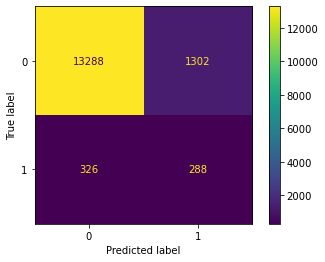

In [209]:
# apresentando os resultados pela Matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
